# StrictJSON Ask Me Anything
- A comprehensive guide as to how to use StrictJSON
- Produced live on 30 Apr 2024
- John Tan Chong Min
- Github repo: https://github.com/tanchongmin/strictjson

In [ ]:
#!pip install strictjson

In [10]:
# yes, you just need these two
import os
from strictjson import *

In [6]:
os.environ['OPENAI_API_KEY'] = '<YOUR API KEY>'

In [11]:
# sample strict_json template
strict_json('You are a classifier',
            'It is a beautiful and sunny day',
            output_format = {'Classification': 'Positive or Negative'})

{'Classification': 'Positive'}

# Basic Stuff: Classification, Extraction, etc

In [14]:
strict_json('You are a poem extender',
            'It is a beautiful and sunny day',
            output_format = {'Poem with three more sentences Array': 'Write three more sentences to complete the poem, type: array'})

Attempting to use LLM to fix ['The birds are chirping in the trees', 'The flowers are blooming in the meadow', 'Nature's beauty surrounds us with peace'] as it is not a proper array
Fixed list: ['The birds are chirping in the trees,', 'The flowers are blooming in the meadow,', "Nature's beauty surrounds us with peace,"]




{'Poem with three more sentences Array': ['The birds are chirping in the trees,',
  'The flowers are blooming in the meadow,',
  "Nature's beauty surrounds us with peace,"]}

In [250]:
text = '''Base Functionalities (see Tutorial.ipynb)
Ensures LLM outputs into a dictionary based on a JSON format (HUGE: Nested lists and dictionaries now supported)
Supports int, float, str, dict, list, Dict[], List[], Enum[], bool type forcing with LLM-based error correction, as well as LLM-based error correction using type: ensure <restriction>, and (advanced) custom user checks using custom_checks
Easy construction of LLM-based functions using Function (Note: renamed from strict_function to keep in line with naming convention of capitalised class groups. strict_function still works for legacy support.)
Easy integration with OpenAI JSON Mode by setting openai_json_mode = True
Exposing of llm variable for strict_json and Function for easy use of self-defined LLMs'''

In [254]:
# Alternate way to get array by doing splits
res = strict_json(system_prompt = '''Output the types that are supported by StrictJSON, including uppercase types
Example Output Type Array: ['int', 'float', 'Enum[]'] ''',
            user_prompt = text,
            output_format = {'Output Type Array': 'Output types, type: array'})

In [255]:
res

{'Output Type Array': ['int',
  'float',
  'str',
  'dict',
  'list',
  'Dict[]',
  'List[]',
  'Enum[]',
  'bool']}

In [256]:
# Alternate way to get array by doing splits
res = strict_json(system_prompt = '''Output the types that are supported by StrictJSON, including uppercase types
Example Output Types: 'int'; 'float'; 'Enum[]' ''',
            user_prompt = text,
            output_format = {'Output Types': 'Output types separated by ;'})

In [257]:
res['Output Types'].split('; ')

['int', 'float', 'str', 'dict', 'list', 'Dict[]', 'List[]', 'Enum[]', 'bool']

In [48]:
res = strict_json(system_prompt = '''Find out all the (obj1, relationship, obj2) triplets''',
            user_prompt = text,
            output_format = {'Triplet Array': 'Triplets of the form (obj1, relationship, obj2), type: array'})

In [51]:
triplet_list = res['Triplet Array']

In [73]:
res2 = strict_json(system_prompt = '''Given the triplet list, write some code to display this as a Knowledge Graph''',
            user_prompt = triplet_list,
            output_format = {'Code': 'Code in Python to display knowledge graph from triplet list'}, model = 'gpt-4-turbo')

In [74]:
print(res2['Code'])

import networkx as nx
import matplotlib.pyplot as plt

triplets = [('Base Functionalities', 'supports', 'int'), ('Base Functionalities', 'supports', 'float'), ('Base Functionalities', 'supports', 'str'), ('Base Functionalities', 'supports', 'dict'), ('Base Functionalities', 'supports', 'list'), ('Base Functionalities', 'supports', 'Dict[]'), ('Base Functionalities', 'supports', 'List[]'), ('Base Functionalities', 'supports', 'Enum[]'), ('Base Functionalities', 'supports', 'bool'), ('Base Functionalities', 'supports', 'type: ensure <restriction>'), ('Base Functionalities', 'supports', 'custom user checks using custom_checks'), ('Base Functionalities', 'supports', 'Function'), ('Base Functionalities', 'supports', 'OpenAI JSON Mode'), ('Base Functionalities', 'exposes', 'llm variable'), ('Base Functionalities', 'exposes', 'Function')]

g = nx.DiGraph()
for s, p, o in triplets:
    g.add_edge(s, o, label=p)
pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=True, node_color='skyblue', n

## How to do error correction for code

In [77]:
import networkx as nx
import matplotlib.pyplot as plt

triplets = [('Base Functionalities', 'supports', 'int'), ('Base Functionalities', 'supports', 'float'), ('Base Functionalities', 'supports', 'str'), ('Base Functionalities', 'supports', 'dict'), ('Base Functionalities', 'supports', 'list'), ('Base Functionalities', 'supports', 'Dict[]'), ('Base Functionalities', 'supports', 'List[]'), ('Base Functionalities', 'supports', 'Enum[]'), ('Base Functionalities', 'supports', 'bool'), ('Base Functionalities', 'supports', 'type: ensure <restriction>'), ('Base Functionalities', 'supports', 'custom user checks using custom_checks'), ('Base Functionalities', 'supports', 'Function'), ('Base Functionalities', 'supports', 'OpenAI JSON Mode'), ('Base Functionalities', 'exposes', 'llm variable'), ('Base Functionalities', 'exposes', 'Function')]

g = nx.DiGraph()
for s, p, o in triplets:
    g.add_edge(s, o, label=p)
pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='k', linewidths=1, font_size=15)
edge_labels = nx.get_edge_attributes(g, 'label')
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)
plt.show()

TypeError: '_AxesStack' object is not callable

<Figure size 640x480 with 0 Axes>

In [78]:
code = '''import networkx as nx
import matplotlib.pyplot as plt

triplets = [('Base Functionalities', 'supports', 'int'), ('Base Functionalities', 'supports', 'float'), ('Base Functionalities', 'supports', 'str'), ('Base Functionalities', 'supports', 'dict'), ('Base Functionalities', 'supports', 'list'), ('Base Functionalities', 'supports', 'Dict[]'), ('Base Functionalities', 'supports', 'List[]'), ('Base Functionalities', 'supports', 'Enum[]'), ('Base Functionalities', 'supports', 'bool'), ('Base Functionalities', 'supports', 'type: ensure <restriction>'), ('Base Functionalities', 'supports', 'custom user checks using custom_checks'), ('Base Functionalities', 'supports', 'Function'), ('Base Functionalities', 'supports', 'OpenAI JSON Mode'), ('Base Functionalities', 'exposes', 'llm variable'), ('Base Functionalities', 'exposes', 'Function')]

g = nx.DiGraph()
for s, p, o in triplets:
    g.add_edge(s, o, label=p)
pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='k', linewidths=1, font_size=15)
edge_labels = nx.get_edge_attributes(g, 'label')
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)
plt.show()'''

error = '''---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[77], line 10
      8     g.add_edge(s, o, label=p)
      9 pos = nx.spring_layout(g)
---> 10 nx.draw(g, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='k', linewidths=1, font_size=15)
     11 edge_labels = nx.get_edge_attributes(g, 'label')
     12 nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)

File ~/anaconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:113, in draw(G, pos, ax, **kwds)
    111 cf.set_facecolor("w")
    112 if ax is None:
--> 113     if cf._axstack() is None:
    114         ax = cf.add_axes((0, 0, 1, 1))
    115     else:

TypeError: '_AxesStack' object is not callable'''

In [80]:
# use strictjson to do error correction
res3 = strict_json(system_prompt = f'''Given the Code and Error, correct the Code
Code: ```{code}```
Error: ```{error}```''',
            user_prompt = '',
            output_format = {'Code': 'Repeat Code',
                             'Error': 'Repeat Error',
                             'Thoughts': 'How to correct code',
                             'Corrected Code': 'Code in Python to display knowledge graph from triplet list'},
                  model = 'gpt-4-turbo')

In [81]:
print(res3)

{'Code': "import networkx as nx\nimport matplotlib.pyplot as plt\n\ntriplets = [('Base Functionalities', 'supports', 'int'), ('Base Functionalities', 'supports', 'float'), ('Base Functionalities', 'supports', 'str'), ('Base Functionalities', 'supports', 'dict'), ('Base Functionalities', 'supports', 'list'), ('Base Functionalities', 'supports', 'Dict[]'), ('Base Functionalities', 'supports', 'List[]'), ('Base Functionalities', 'supports', 'Enum[]'), ('Base Functionalities', 'supports', 'bool'), ('Base Functionalities', 'supports', 'type: ensure <restriction>'), ('Base Functionalities', 'supports', 'custom user checks using custom_checks'), ('Base Functionalities', 'supports', 'Function'), ('Base Functionalities', 'supports', 'OpenAI JSON Mode'), ('Base Functionalities', 'exposes', 'llm variable'), ('Base Functionalities', 'exposes', 'Function')]\n\ng = nx.DiGraph()\nfor s, p, o in triplets:\n    g.add_edge(s, o, label=p)\npos = nx.spring_layout(g)\nnx.draw(g, pos, with_labels=True, node

In [82]:
print(res3['Corrected Code'])

import networkx as nx
import matplotlib.pyplot as plt

triplets = [('Base Functionalities', 'supports', 'int'), ('Base Functionalities', 'supports', 'float'), ('Base Functionalities', 'supports', 'str'), ('Base Functionalities', 'supports', 'dict'), ('Base Functionalities', 'supports', 'list'), ('Base Functionalities', 'supports', 'Dict[]'), ('Base Functionalities', 'supports', 'List[]'), ('Base Functionalities', 'supports', 'Enum[]'), ('Base Functionalities', 'supports', 'bool'), ('Base Functionalities', 'supports', 'type: ensure <restriction>'), ('Base Functionalities', 'supports', 'custom user checks using custom_checks'), ('Base Functionalities', 'supports', 'Function'), ('Base Functionalities', 'supports', 'OpenAI JSON Mode'), ('Base Functionalities', 'exposes', 'llm variable'), ('Base Functionalities', 'exposes', 'Function')]

g = nx.DiGraph()
for s, p, o in triplets:
    g.add_edge(s, o, label=p)
pos = nx.spring_layout(g)
fig, ax = plt.subplots()
nx.draw(g, pos, ax=ax, with_labe

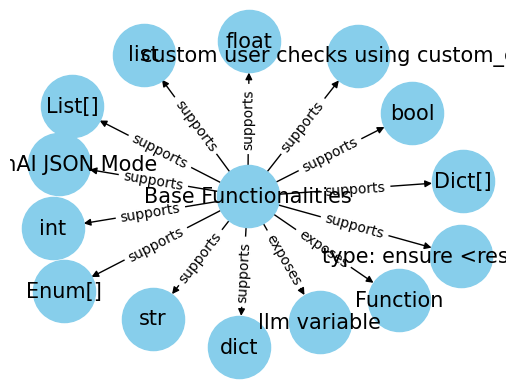

In [83]:
import networkx as nx
import matplotlib.pyplot as plt

triplets = [('Base Functionalities', 'supports', 'int'), ('Base Functionalities', 'supports', 'float'), ('Base Functionalities', 'supports', 'str'), ('Base Functionalities', 'supports', 'dict'), ('Base Functionalities', 'supports', 'list'), ('Base Functionalities', 'supports', 'Dict[]'), ('Base Functionalities', 'supports', 'List[]'), ('Base Functionalities', 'supports', 'Enum[]'), ('Base Functionalities', 'supports', 'bool'), ('Base Functionalities', 'supports', 'type: ensure <restriction>'), ('Base Functionalities', 'supports', 'custom user checks using custom_checks'), ('Base Functionalities', 'supports', 'Function'), ('Base Functionalities', 'supports', 'OpenAI JSON Mode'), ('Base Functionalities', 'exposes', 'llm variable'), ('Base Functionalities', 'exposes', 'Function')]

g = nx.DiGraph()
for s, p, o in triplets:
    g.add_edge(s, o, label=p)
pos = nx.spring_layout(g)
fig, ax = plt.subplots()
nx.draw(g, pos, ax=ax, with_labels=True, node_color='skyblue', node_size=2000, edge_color='k', linewidths=1, font_size=15)
edge_labels = nx.get_edge_attributes(g, 'label')
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels, ax=ax)
plt.show()

In [84]:
code = '''import networkx as nx
import matplotlib.pyplot as plt

triplets = [('Base Functionalities', 'supports', 'int'), ('Base Functionalities', 'supports', 'float'), ('Base Functionalities', 'supports', 'str'), ('Base Functionalities', 'supports', 'dict'), ('Base Functionalities', 'supports', 'list'), ('Base Functionalities', 'supports', 'Dict[]'), ('Base Functionalities', 'supports', 'List[]'), ('Base Functionalities', 'supports', 'Enum[]'), ('Base Functionalities', 'supports', 'bool'), ('Base Functionalities', 'supports', 'type: ensure <restriction>'), ('Base Functionalities', 'supports', 'custom user checks using custom_checks'), ('Base Functionalities', 'supports', 'Function'), ('Base Functionalities', 'supports', 'OpenAI JSON Mode'), ('Base Functionalities', 'exposes', 'llm variable'), ('Base Functionalities', 'exposes', 'Function')]

g = nx.DiGraph()
for s, p, o in triplets:
    g.add_edge(s, o, label=p)
pos = nx.spring_layout(g)
fig, ax = plt.subplots()
nx.draw(g, pos, ax=ax, with_labels=True, node_color='skyblue', node_size=2000, edge_color='k', linewidths=1, font_size=15)
edge_labels = nx.get_edge_attributes(g, 'label')
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels, ax=ax)
plt.show()'''

In [85]:
# use strictjson to do error correction
res3 = strict_json(system_prompt = f'''Given the Code, change it to fit user query
Code: ```{code}```''',
            user_prompt = 'Change node size to be smaller',
            output_format = {'Corrected Code': 'Code in Python to fulfil user query'},
                  model = 'gpt-4-turbo')

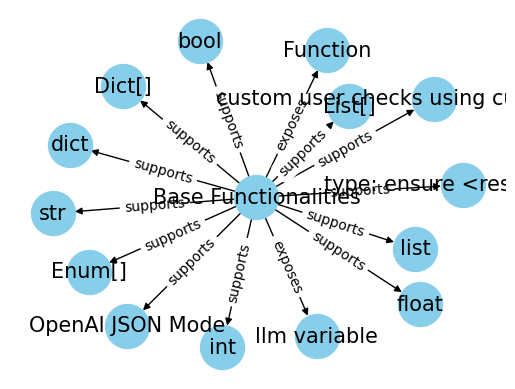

In [87]:
exec(res3['Corrected Code'])

# Multiple Output Types

In [100]:
res = strict_json('You are an arbitrary output mapper that takes in user text and outputs it to the respective output fields',
            'It is a bright and sunny day',
            output_format = {'Adjectives Array': 'Array of adjectives, type: array',
                            'Number of Adjectives': 'type: int',
                            'Sentiment': 'Positive or Negative',
                            'Sentiment2': 'type: Enum["P", "N", "O"]',
                            'Negative Sentiment': 'Is it negative, type: Enum[True, False]',
                            'Repeat the sentence': 'sentence ,type: str',
                            'Adjectives and their meaning Array': 'type: Array[Dict["Adjective", "Meaning"]]'})

In [103]:
res['Adjectives and their meaning Array'][0]['Adjective']

'bright'

In [104]:
res['Adjectives and their meaning Array'][0]['Meaning']

'full of light'

# Your own LLM (Important)

In [118]:
def llm(system_prompt: str, user_prompt: str):
    ''' Here, we use OpenAI for illustration, you can change it to your own LLM '''
    # ensure your LLM imports are all within this function
    from openai import OpenAI
    
    # take an image from a file - maybe do regex to get filename from system/user prompt"
    # system_prompt = '%%Filename: big.jpeg%%'
    # Do processing to get the file, convert to tokens, pass into VLM
    
    # define your own LLM here
    client = OpenAI()
    response = client.chat.completions.create(
        model='gpt-3.5-turbo',
        temperature = 0,
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_prompt}
        ]
    )
    return response.choices[0].message.content
    # return "{'Adjective Array': 'bright, hello'}"

In [106]:
res = strict_json(system_prompt = 'You are an arbitrary output mapper that takes in user text and outputs it to the respective output fields',
            user_prompt = 'It is a bright and sunny day',
            output_format = {'Adjectives Array': 'Array of adjectives, type: array',
                            'Number of Adjectives': 'type: int',
                            'Sentiment': 'Positive or Negative',
                            'Sentiment2': 'type: Enum["P", "N", "O"]',
                            'Negative Sentiment': 'Is it negative, type: Enum[True, False]',
                            'Repeat the sentence': 'sentence ,type: str',
                            'Adjectives and their meaning Array': 'type: Array[Dict["Adjective", "Meaning"]]'},
                 llm = llm)

In [119]:
res = strict_json(system_prompt = 'You are an arbitrary output mapper that takes in user text and outputs it to the respective output fields',
            user_prompt = 'It is a bright and sunny day',
            output_format = {'Adjective Array': 'array of adjectives, type: array'},
                 llm = llm)

In [120]:
res

{'Adjective Array': ['bright', 'sunny']}

# Chain of Thought
- Problem -> Solution (typical)
- Problem -> Substep 1 -> Substep 2 -> Solution (Chain of Thought)

In [168]:
strict_json('Solve the Math problem',
         'Mary has 5 apples. John has 2 apples. Mary gave John 1 apple. How many apples do they have in total?',
            output_format = {'Thoughts': 'Think step by step',
                        'Output': 'Number'})

{'Thoughts': "Mary had 5 apples, gave 1 to John, so she has 4 left. John had 2 apples, received 1 from Mary, so he has 3 now. Total apples = Mary's apples + John's apples.",
 'Output': 7}

In [122]:
strict_json('Plan a 3-day trip to a country',
            'Italy',
            output_format = {'Trip Plan': 'Plan'})

{'Trip Plan': 'Day 1: Explore the historic sites of Rome including the Colosseum and Vatican City. Day 2: Visit the picturesque city of Florence and see the iconic Duomo and Uffizi Gallery. Day 3: Relax in the charming coastal town of Cinque Terre, known for its colorful houses and scenic views.'}

In [129]:
strict_json('Plan a 3-day trip to a country',
            'Italy',
            output_format = {'Broad Trip Plan': 'Broad Overall Plan for each day in the format <Day> - <Plan>, separated by comma',
                            'Specific Trip Plan': 'Plan for each day sticking to Overall Plan, including morning, afternoon, evening',
                            'Transport Arrangements': 'Transport arrangements for each day',
                            'Accomodation Arrangements': 'Accomodation arrangements for each day'})

{'Broad Trip Plan': 'Day 1 - Explore Rome, Day 2 - Visit Florence, Day 3 - Relax in Venice',
 'Specific Trip Plan': "Day 1: Morning - Visit Colosseum and Roman Forum, Afternoon - Explore Vatican City, Evening - Stroll around Trevi Fountain. Day 2: Morning - Visit Uffizi Gallery, Afternoon - Explore Ponte Vecchio, Evening - Enjoy Tuscan cuisine. Day 3: Morning - Visit St. Mark's Basilica, Afternoon - Gondola ride in Grand Canal, Evening - Explore Rialto Bridge.",
 'Transport Arrangements': 'Day 1: Metro in Rome, Day 2: Train from Rome to Florence, Day 3: Train from Florence to Venice',
 'Accomodation Arrangements': 'Day 1: Hotel in Rome, Day 2: Hotel in Florence, Day 3: Hotel in Venice'}

# TaskGen Teaser

In [132]:
agent = Agent('Trip Planner', 'Plan a trip to a country, doing up a broad trip plan, specific trip plan, transport arrangements, accomodation arrangements')

In [133]:
agent.run('Plan a 3-day trip to Italy. Do not book anything.')

Subtask identified: Research popular destinations in Italy
Getting LLM to perform the following task: Research popular destinations in Italy
> Some popular destinations in Italy include Rome, Venice, Florence, Milan, Amalfi Coast, and Tuscany.

Subtask identified: Create a detailed itinerary for each day of the trip
Getting LLM to perform the following task: Create a detailed itinerary for each day of the trip
> Day 1: Explore the historic sites of Rome including the Colosseum, Roman Forum, and Pantheon. Enjoy authentic Italian cuisine for dinner. Day 2: Take a gondola ride in Venice, visit St. Mark's Square, and explore the Grand Canal. Day 3: Visit the Uffizi Gallery in Florence, walk around the Ponte Vecchio, and try some gelato at a local gelateria.

Subtask identified: Research transportation options within Italy
Getting LLM to perform the following task: Research transportation options within Italy
> For transportation within Italy, you can choose between trains, buses, and domes

['Some popular destinations in Italy include Rome, Venice, Florence, Milan, Amalfi Coast, and Tuscany.',
 "Day 1: Explore the historic sites of Rome including the Colosseum, Roman Forum, and Pantheon. Enjoy authentic Italian cuisine for dinner. Day 2: Take a gondola ride in Venice, visit St. Mark's Square, and explore the Grand Canal. Day 3: Visit the Uffizi Gallery in Florence, walk around the Ponte Vecchio, and try some gelato at a local gelateria.",
 'For transportation within Italy, you can choose between trains, buses, and domestic flights. The train system is efficient and connects major cities like Rome, Venice, and Florence. Buses are a cost-effective option for shorter distances, while domestic flights are ideal for longer distances such as Milan to Sicily.',
 'Research accommodation options in Italy: Some popular accommodation options in Italy include luxury hotels in Rome, boutique hotels in Venice, charming bed and breakfasts in Florence, and agriturismos in Tuscany. Each c

# Paragraph Summary

In [235]:
paragraph = ['' for _ in range(2)]

In [236]:
paragraph[0] = '''The Inaccessible Island rail (Laterallus rogersi) is a bird found only on Inaccessible Island in the South Atlantic Tristan archipelago. This rail, the smallest extant flightless bird, was described by physician Percy Lowe in 1923. The adult has brown plumage, a black bill, black feet, and red eyes. It occupies most habitats on the island, from the beaches to the central plateau, feeding on a variety of small invertebrates and some plant matter. Pairs are territorial and monogamous; both parents incubate the eggs and raise the chicks. The rail's adaptations to living on a tiny island at high densities include a low basal metabolic rate, small clutch sizes, and flightlessness. Unlike many other oceanic islands, Inaccessible Island has remained free from introduced predators, allowing this species to flourish while many other flightless rails have gone extinct. The species is nevertheless considered vulnerable, due to the danger of a single catastrophe wiping out the small, isolated population. '''

In [237]:
paragraph[1] = '''Acting prime minister of Haiti Ariel Henry (pictured) resigns, and is replaced by Michel Patrick Boisvert while the Transitional Presidential Council is sworn in.
The Ownership, Unity and Responsibility Party, led by Prime Minister Manasseh Sogavare, wins the most seats in the Solomon Islands general election but falls short of a majority.
NASA announces that the Voyager 1 space probe is sending readable data for the first time in five months.
The HDZ-led coalition wins the most seats in the Croatian parliamentary election but falls short of a majority.
Ich­thy­o­titan, the largest known marine reptile, is formally described.'''

In [143]:
for para in paragraph:
    res = strict_json('Take the paragraph and summarise it in the following json format',
        para,
        output_format = {'Bullet Point Array': 'Summarise each sentence as a bullet point of 10 words maximum each, type: array'})
    print(res)

{'Bullet Point Array': ['Inaccessible Island rail found only on Inaccessible Island in Tristan archipelago.', 'Described by physician Percy Lowe in 1923, smallest flightless bird.', 'Adult has brown plumage, black bill, feet, and red eyes.', 'Occupies various habitats, feeds on invertebrates and some plant matter.', 'Pairs are territorial and monogamous, share incubation and chick-raising.', 'Adaptations include low metabolic rate, small clutch sizes, flightlessness.', 'Inaccessible Island lacks introduced predators, aiding species survival.', 'Considered vulnerable due to risk of catastrophe wiping out population.']}
{'Bullet Point Array': ['Ariel Henry resigns, replaced by Michel Patrick Boisvert in Haiti.', 'Ownership, Unity and Responsibility Party wins most seats in Solomon Islands.', 'Voyager 1 space probe sends readable data after five months.', 'HDZ-led coalition wins most seats in Croatian parliamentary election.', 'Ichthyotitan, largest marine reptile, is formally described.'

In [137]:
print(paragraph)

The Inaccessible Island rail (Laterallus rogersi) is a bird found only on Inaccessible Island in the South Atlantic Tristan archipelago. This rail, the smallest extant flightless bird, was described by physician Percy Lowe in 1923. The adult has brown plumage, a black bill, black feet, and red eyes. It occupies most habitats on the island, from the beaches to the central plateau, feeding on a variety of small invertebrates and some plant matter. Pairs are territorial and monogamous; both parents incubate the eggs and raise the chicks. The rail's adaptations to living on a tiny island at high densities include a low basal metabolic rate, small clutch sizes, and flightlessness. Unlike many other oceanic islands, Inaccessible Island has remained free from introduced predators, allowing this species to flourish while many other flightless rails have gone extinct. The species is nevertheless considered vulnerable, due to the danger of a single catastrophe wiping out the small, isolated popu

# Reflection

In [160]:
strict_json('Create a four-sentence poem with 5 words that rhyme with cool. Each sentence should end with a .',
 '',
        output_format = {'5 words that rhyme with cool': 'words',
                        'Four sentence poem': 'Poem',
                        'Reflection': 'Count the number of sentences (ending with .) and reflect on whether it is four sentences',
                        'Updated poem with four sentences': 'Poem'})

{'5 words that rhyme with cool': 'pool, rule, drool, school, fool',
 'Four sentence poem': "By the pool, feeling cool. Follow the rule, don't drool. Learning in school, that's the tool. Acting like a fool.",
 'Reflection': 'There are four sentences (ending with .)',
 'Updated poem with four sentences': "By the pool, feeling cool. Follow the rule, don't drool. Learning in school, that's the tool. Acting like a fool."}

In [166]:
strict_json('Solve the Math problem',
         'Mary has 5 apples. John has 2 apples. Mary gave John 1 apple. How many apples do they have in total?',
            output_format = {'Output': 'Number',
                        'Reflection': 'Do an equation for Mary and John and evaluate the number of apples at the end',
                        'Corrected Output': 'Number'})

{'Output': 6, 'Reflection': '5 - 1 + 2 + 1 = 7', 'Corrected Output': 7}

# Evaluate with code for greater reliability

In [180]:
strict_json('Solve the Math problem',
         'Mary has 5223*2345 apples. John has 2 apples. Mary gave John 1112*342 apples. How many apples do they have in total?',
            output_format = {'Thoughts': 'Think step by step how to solve the problem',
                             'Output': 'Number'})

{'Thoughts': 'Calculate the total number of apples Mary has. Then calculate the total number of apples John has after Mary gives him some apples. Finally, add the total apples Mary has and the total apples John has to find the overall total number of apples.',
 'Output': 12197835}

In [197]:
res = strict_json('Solve the Math problem by writing a program',
         'Mary has 5223*2345 apples. John has 2 apples. Mary gave John 1112*342 apples. How many apples do they have in total?',
            output_format = {'Thoughts': 'Think step by step how to solve the problem',
                             'Reflection': 'Reflect on equation for each person after the transfer',
                             'Updated Thoughts': 'Think step by step how to solve the problem',
                             'Code': 'Python function named answer to solve the problem'})

In [199]:
res

{'Thoughts': 'Calculate the total number of apples Mary has. Then calculate the total number of apples John has after receiving apples from Mary. Finally, add the total apples of Mary and John.',
 'Reflection': 'Mary has 5223*2345 - 1112*342 apples after giving some to John. John has 2 + 1112*342 apples after receiving from Mary.',
 'Updated Thoughts': 'Calculate the total apples for Mary and John separately and then add them together to get the final total.',
 'Code': 'def answer():\n    mary_total = 5223*2345 - 1112*342\n    john_total = 2 + 1112*342\n    total = mary_total + john_total\n    return total'}

In [200]:
res['Code']

'def answer():\n    mary_total = 5223*2345 - 1112*342\n    john_total = 2 + 1112*342\n    total = mary_total + john_total\n    return total'

In [201]:
exec(res['Code'])

In [202]:
answer()

12247937

# Evaluate with rule-based filters for greater reliability

In [207]:
strict_json('Extract out the filter fields according to user query. If filter does not exist, output -1 or NA',
            'Get me an ice-cream that costs below 50 dollars',
            output_format = {'Price lower than': 'type: int',
                             'Price greater than': 'type: int',
                             'Item': 'type: str'})

{'Price lower than': 50, 'Price greater than': -1, 'Item': 'ice-cream'}

# Multiple Chains
- Can execute conditional flows
- Can break down a complex problem into easier sub-problems

In [221]:
res = strict_json('Generate me the Name of Card and type of a Yugioh Playing Card',
            '',
            output_format = {'Name of Card': 'type: str', 'Type': 'type: Enum["Trap", "Magic", "Monster"]'})

In [222]:
res

{'Name of Card': 'Yami', 'Type': 'Magic'}

In [228]:
res['Type'] = 'Monster'

In [229]:
if res['Type'] == 'Monster':
    res2 = strict_json('Given the name and type of a Yugioh Playing Card, generate me a description and the attack/defence of the card',
                   res,
                   output_format = {'50-word description': '50 words, type: str', 'Attack': 'type: int', 'Defence': 'type: int'})
elif res['Type'] == 'Magic':
    res2 = strict_json('Given the name and type of a Yugioh Playing Card, generate me a 100-word description of the magic',
                   res,
                   output_format = {'100-word description': '100 words'})

An exception occurred: "50-word description" not in json string output. You must use "###{key}###" to enclose the {key}.
Current invalid json format: {'Dark field surrounds monsters, boosting dark types and weakening light types. Beware of its mystical power.': '<50 words, type: str>', 'Attack': 1900, 'Defence': 2100}


In [230]:
res2

{'50-word description': 'Yami shrouds the field in darkness, empowering dark monsters while weakening light ones. Its mysterious energy can turn the tide of battle.',
 'Attack': 2000,
 'Defence': 2300}